In [ ]:
from zipfile import ZipFile
file_name = "/content/drive/MyDrive/tasks/yolo_v5/data.zip"
with ZipFile(file_name, 'r') as zip:
  zip.extractall('/content/drive/MyDrive/tasks/yolo_v5/data')
  print('done')

done


In [ ]:
%cd /content/drive/MyDrive/tasks/yolo_v5

/content/drive/MyDrive/tasks/yolo_v5


In [ ]:
pwd

'/content/drive/MyDrive/tasks/yolo_v5'

In [ ]:
! pip install -qr https://raw.githubusercontent.com/ultralytics/yolov5/master/requirements.txt

     |████████████████████████████████| 1.6 MB 5.2 MB/s 


In [ ]:
!pip install torch 


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import torch
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
from IPython.display import Image #this is to render predictions


In [ ]:
!git clone https://github.com/ultralytics/yolov5


Cloning into 'yolov5'...
remote: Enumerating objects: 14919, done.
remote: Counting objects: 100% (250/250), done.
remote: Compressing objects: 100% (139/139), done.
remote: Total 14919 (delta 157), reused 192 (delta 110), pack-reused 14669
Receiving objects: 100% (14919/14919), 13.61 MiB | 6.33 MiB/s, done.
Resolving deltas: 100% (10296/10296), done.


In [ ]:
%cd yolov5


/content/drive/MyDrive/tasks/yolo_v5/yolov5


In [ ]:
!pip install -r requirements.txt

Load Model

In [ ]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

/usr/local/lib/python3.7/dist-packages/torch/hub.py:267: UserWarning: You are about to download and run code from an untrusted repository. In a future release, this won't be allowed. To add the repository to your trusted list, change the command to {calling_fn}(..., trust_repo=False) and a command prompt will appear asking for an explicit confirmation of trust, or load(..., trust_repo=True), which will assume that the prompt is to be answered with 'yes'. You can also use load(..., trust_repo='check') which will only prompt for confirmation if the repo is not already trusted. This will eventually be the default behaviour
  "You are about to download and run code from an untrusted repository. In a future release, this won't "
Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip
YOLOv5 🚀 2022-11-14 Python-3.7.15 torch-1.12.1+cu113 CPU



  0%|          | 0.00/14.1M [00:00<?, ?B/s]


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


In [ ]:
model

Make Detection using pretrained


In [ ]:
img = '/content/drive/MyDrive/tasks/yolo_v5/data/test/apple_77.jpg'


In [ ]:
results = model(img)
results.print()

image 1/1: 229x300 6 apples
Speed: 72.0ms pre-process, 388.2ms inference, 20.7ms NMS per image at shape (1, 3, 512, 640)


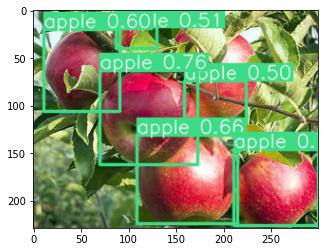

In [ ]:
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

In [ ]:
results.render()


In [ ]:
np.array(results.render()).shape

(1, 229, 300, 3)

**Real time detection**


In [ ]:
import cv2

In [ ]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    # Make detections 
    results = model(frame)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()


#Train From Scratch

In [ ]:
!git clone https://github.com/ultralytics/yolov5  # clone
%cd yolov5
%pip install -qr requirements.txt  # install



Cloning into 'yolov5'...
remote: Enumerating objects: 14919, done.
remote: Counting objects: 100% (250/250), done.
remote: Compressing objects: 100% (138/138), done.
remote: Total 14919 (delta 156), reused 194 (delta 111), pack-reused 14669
Receiving objects: 100% (14919/14919), 13.67 MiB | 6.62 MiB/s, done.
Resolving deltas: 100% (10298/10298), done.
/content/drive/MyDrive/tasks/yolo_v5/yolov5


In [ ]:
import torch
# import utils
display = utils.notebook_init()  # checks

YOLOv5 🚀 2022-11-14 Python-3.7.15 torch-1.12.1+cu113 CPU


Setup complete ✅ (2 CPUs, 12.7 GB RAM, 22.7/107.7 GB disk)


In [ ]:
%cd /content/drive/MyDrive/tasks/yolo_v5/yolov5

/content/drive/MyDrive/tasks/yolo_v5/yolov5


In [ ]:
!python train.py --img 416 --batch 16 --epochs 30 --data coco.yaml --weights yolov5s.pt --cache

train: weights=yolov5s.pt, cfg=, data=coco.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=30, batch_size=16, imgsz=416, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v6.2-239-gf33718f Python-3.7.15 torch-1.12.1+cu113 CPU

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, degrees=0.0, translate=0.1,